# Loading the dataset into python environment

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) #to avoid unnecessary warnings from seaborn

# Make ‘PassengerId’ as the index column

In [7]:
df=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

# Checking the basic details of the dataset

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Filling all the missing values present in columns of the dataset

In [13]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Checking and handling outliers in the dataset

## Fare

<AxesSubplot:xlabel='Fare'>

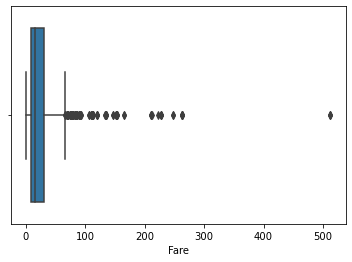

In [15]:
sns.boxplot(df['Fare'],data=df)

In [16]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Fare'][(df['Fare']>upper_whisker)|(df['Fare']<lower_whisker)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='Fare'>

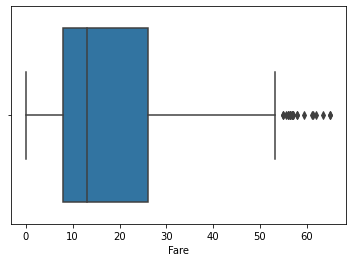

In [17]:
sns.boxplot(df['Fare'],data=df)

## Age

<AxesSubplot:xlabel='Age'>

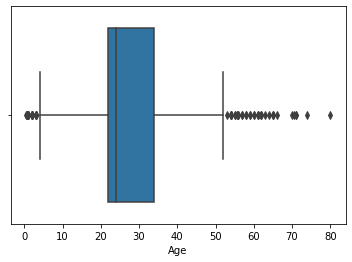

In [18]:
sns.boxplot(df['Age'],data=df)

In [19]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Age'][(df['Age']>upper_whisker)|(df['Age']<lower_whisker)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='Age'>

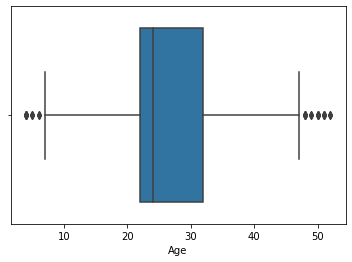

In [20]:
sns.boxplot(df['Age'],data=df)

## SibSp

<AxesSubplot:xlabel='SibSp'>

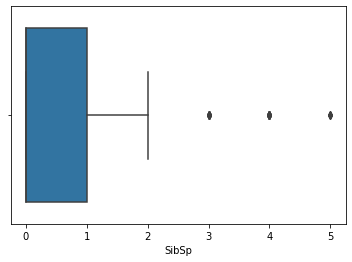

In [21]:
sns.boxplot(df['SibSp'],data=df)

In [22]:
Q1 = df['SibSp'].quantile(0.10)
Q3 = df['SibSp'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['SibSp'][(df['SibSp']>upper_whisker)|(df['SibSp']<lower_whisker)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='SibSp'>

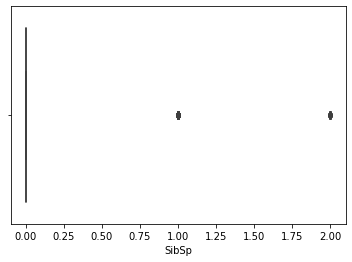

In [23]:
sns.boxplot(df['SibSp'],data=df)

# Min Max scaling on the feature set (Target: Survived)

In [32]:
data1=df

In [33]:
data1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [34]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,24.0,0,0,8.4583,Q


In [54]:
data2=data1.drop([ 'Sex','Embarked'],axis=1)

In [56]:
x=data2.drop(('Survived'),axis=1)
y=data2['Survived']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lin_reg=LinearRegression()
model=lin_reg.fit(x_train,y_train)
predictions=model. predict (x_test)

In [61]:
from sklearn.metrics import mean_squared_error,r2_score

In [63]:
print('The mean squared error value is',mean_squared_error(y_test,predictions))
print('The r squared value is',r2_score(y_test,predictions))

The mean squared error value is 0.1857338565827505
The r squared value is 0.11431942220486702


In [64]:
#min-max scaling

In [65]:
x.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,24.0,0,0,8.4583


In [68]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max_scaler.fit_transform(x)

In [71]:
type(x)

numpy.ndarray

In [72]:
x

array([[1.        , 0.375     , 0.5       , 0.        , 0.11153846],
       [1.        , 0.45833333, 0.        , 0.        , 0.12192308],
       [0.        , 0.64583333, 0.5       , 0.        , 0.81692308],
       ...,
       [1.        , 0.41666667, 0.5       , 0.33333333, 0.36076923],
       [0.        , 0.45833333, 0.        , 0.        , 0.46153846],
       [1.        , 0.58333333, 0.        , 0.        , 0.11923077]])

In [73]:
x=pd.DataFrame(x,columns=[ 'Pclass', 'Age', 'SibSp','Parch', 'Fare'])

In [74]:
x.head()

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.375000,0.5,0.0,0.111538
1,1.0,0.458333,0.0,0.0,0.121923
2,0.0,0.645833,0.5,0.0,0.816923
3,1.0,0.645833,0.0,0.0,0.123846
4,1.0,0.416667,0.0,0.0,0.130128


In [79]:
data3=data1.drop(['Pclass', 'Age', 'Parch', 'Fare'],axis=1)
data3.head()

,Survived,Sex,SibSp,Embarked
PassengerId,,,,
1,0,male,1,S
3,1,female,0,S
4,1,female,1,S
5,0,male,0,S
6,0,male,0,Q


In [81]:
data4=pd.concat([data3, x], axis=1)
data4.head()

,Survived,Sex,SibSp,Embarked,Pclass,Age,SibSp,Parch,Fare
1,0.0,male,1.0,S,1.0,0.458333,0.0,0.000000,0.121923
3,1.0,female,0.0,S,1.0,0.645833,0.0,0.000000,0.123846
4,1.0,female,1.0,S,1.0,0.416667,0.0,0.000000,0.130128
5,0.0,male,0.0,S,1.0,0.479167,0.0,0.333333,0.171282
6,0.0,male,0.0,Q,0.5,0.208333,0.5,0.000000,0.462628
